In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'sarjana' : [0,0,0,1,1,1],
    'diterima' : [0,0,0,1,1,1]
})

- Root : starting question akar, awal dari percabangan (sarjana atau tidak)
- nodes : jumlah kotak
- question branch/internal nodes percabnagan pertanyaaan
- leafs : keputusan akhir

dari decision trees dapat dikembangkan menjadi random forest dan bus

- 1 root dan 2 leaf = stump

In [3]:
df

,sarjana,diterima
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1


               Sarjana?
                 |
         True ___|___ false
             |       |
          diterima   diterima
          2+    1-   1+    2-

## Gini Impurity

- Hitung Gini untuk tiap leaf dalam feature: Gini S1True & S1False
- Gini $\displaystyle = 1 - $ (probability TRUE) $^2 - $ (probability FALSE) $^2$
- Hitung Gini total untuk 1 feature: gini S1

               Sarjana?
                 |
         True ___|___ false
             |       |
          diterima   diterima
          2+    1-   1+    2-
         g:0.4444     g:0.4444
     
- giniS1True = 1 - (2/3)^2 - (1/3)^2

In [4]:
giniS1True = 1 - (2/3)**2 - (1/3)**2
giniS1True

0.4444444444444445

In [5]:
# - giniS1True = 1 - (2/3)^2 - (1/3)^2 = 0.44444
# - giniS1False = 1 - (2/3)^2 - (1/3)^2 = 0.44444

# - giniSarjana = (totalDataS1True/totalData) * giniS1True
# - giniSarjana = (3/6)*0.44444 + (3/6)*0.44444

In [6]:
giniS1True = 1 - (2/3)**2 - (1/3)**2
giniS1False = 1 - (2/3)**2 - (1/3)**2
giniS1 = (3/6)*giniS1True + (3/6)*giniS1False
giniS1True,giniS1False,giniS1

(0.4444444444444445, 0.4444444444444445, 0.4444444444444445)

In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(df[['sarjana']],df['diterima'])
model.predict([[0]])[0]

0

In [8]:
tree.plot_tree(model.fit(df[['sarjana']],df['diterima']))


[Text(248.0, 277.2, 'X[0] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(124.0, 92.39999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(372.0, 92.39999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

In [9]:
tree.export_graphviz(model.fit(df[['sarjana']],df['diterima']),
                    out_file = 'decision.dot',
                    feature_names = ['Sarjana'],
                    class_names = ['Diterima','Tidak diterima'])


### https://dreampuf.github.io/GraphvizOnline

![decisiontree](./graphviz.png)

### Entropy & Gain

- Hitung Entropy untuk tiap leaf di feature: E(sTrue) & E(s1False)
- Entropy $\displaystyle \sum -p_i \cdot log_2 (p_i)$ 
- Gain = E - E.feature

              Sarjana?
                 |
         True ___|___ false
             |       |
          diterima   diterima
          2+    1-   1+    2-
         g:0.918   g:0.918
         
         
         
     
- ES1True = -1 * (2/3) * 2log(2/3)

In [10]:
# Manual Count Using Entropy

Es1TruedTrue = -1 * (2/3) * np.log2(2/3)
Es1TruedFalse = -1 * (1/3) * np.log2(1/3)
Es1True = Es1TruedTrue + Es1TruedFalse
Es1True,Es1TruedTrue,Es1TruedFalse

(0.9182958340544896, 0.38997500048077083, 0.5283208335737187)

In [11]:
Es1TruedTrue = -1 * (1/3) * np.log2(1/3)
Es1TruedFalse = -1 * (2/3) * np.log2(2/3)
Es1True = Es1TruedTrue + Es1TruedFalse
Es1True,Es1TruedTrue,Es1TruedFalse

(0.9182958340544896, 0.5283208335737187, 0.38997500048077083)

In [14]:
Esarjana = -1 * (3/6) * np.log2(3/6) + -1 * (3/6) * np.log2(3/6)
Esarjana

1.0

In [20]:
from sklearn import tree
# Entropy Using sklearn
model1 = tree.DecisionTreeClassifier(criterion='entropy')
model1.fit(df[['sarjana']],df['diterima'])
model1.predict([[0]])[0]

0

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

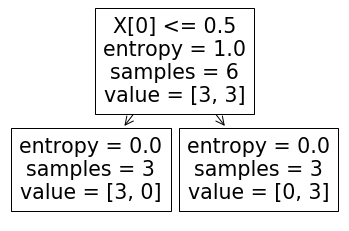

In [13]:
tree.plot_tree(model1.fit(df[['sarjana']],df['diterima']))


In [17]:
df1 = pd.DataFrame([
    {'sarjana':1 , 'sehat':1, 'supel':1, 'diterima':1},
    {'sarjana':1 , 'sehat':0, 'supel':0, 'diterima':1},
    {'sarjana':0 , 'sehat':1, 'supel':1, 'diterima':0},
    {'sarjana':0 , 'sehat':0, 'supel':1, 'diterima':0},
    {'sarjana':0 , 'sehat':0, 'supel':1, 'diterima':0},


    
])
df1

,sarjana,sehat,supel,diterima
0,1,1,1,1
1,1,0,0,1
2,0,1,1,0
3,0,0,1,0
4,0,0,1,0


              Sarjana?
                 |
         True ___|___ false
             |       |
          diterima   diterima
          2+    0-   0+    3-
         g:0.918   g:0.918
         

- gini S1True = 1 -(2/2)^2 - (0/2)^2 = 0
- gini S1False = 1 - (0/3)^2 - (3/3)^2 = 0
- gini Sarjana = (2/5) * 0 (3/5) * 0 = 0


              Sehat?
                 |
         True ___|___ false
             |       |
          diterima   diterima
          1+    1-   1+    2-
          
- gini sehatTrue = 1 - (1/2)^2 - (1/2)^2 =  0.5
- gini sehatFalse = 1 - (1/3)^2 - (2/3)^2 =0.4444
- gini Sehat = (2/5)*0.5 + (3/5)*0.44444 = 0.46


                Supel?
                 |
         True ___|___ false
             |       |
          diterima   diterima
          1+    1-   1+    2-
          


In [18]:
model2 = tree.DecisionTreeClassifier(criterion='gini')
model2.fit(df1[['sarjana','sehat','supel']],df1['diterima'])
model2.predict([[0,1,1]])[0]

0

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

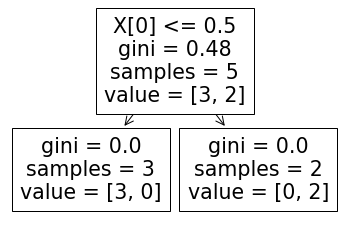

In [22]:
tree.plot_tree(model2.fit(df1[['sarjana','sehat','supel']],df1['diterima']))

In [24]:
tree.export_graphviz(model2.fit(df1[['sarjana','supel','sehat']],df1['diterima']),
                    out_file = 'decision1.dot',
                    feature_names = ['Sarjana','Sehat','Supel'],
                    class_names = ['Diterima','Tidak diterima'])

In [29]:
from sklearn.datasets import load_iris
x = load_iris()

In [34]:
df2 = pd.DataFrame(x['data'], columns=['sl','sw','pl','pw'])
df2['target'] = x['target']
model3 = tree.DecisionTreeClassifier()
model3.fit(df2[['sl','sw','pl','pw']],df2['target'])

tree.export_graphviz(
    model3.fit(df2[['sl','sw','pl','pw']],df2['target']),
    out_file = 'decisionIris.dot',
    feature_names = ['SL','SW','PL','PW'],
    class_names = x['target_names'])
    